In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [259]:
df=pd.read_csv("ToyotaCorolla - MLR.csv")

EDA

In [262]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [264]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [266]:
df.duplicated().sum()

1

In [268]:
df.drop_duplicates(inplace=True)

In [270]:
df.duplicated().sum()

0

In [272]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [274]:
##### checking the outliers

In [286]:
df.boxplot()

<Axes: >

In [288]:
##### Removing the outliers

In [290]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme=Q1-1.5*IQR
    upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes([int,float]).columns:
    outlier_capping(df,col)


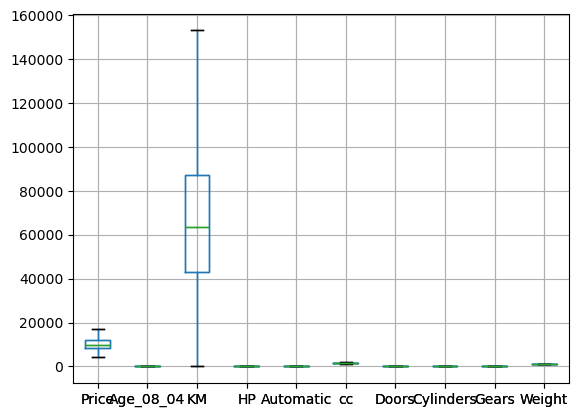

In [292]:
df.boxplot()
plt.show()

In [294]:
### compare the two columns and form a bar chart[Price,Weight]

In [296]:
plt.bar(df['Price'],df['Weight'],color='yellow',edgecolor='orange',width=0.5,linewidth=5)

<BarContainer object of 1435 artists>

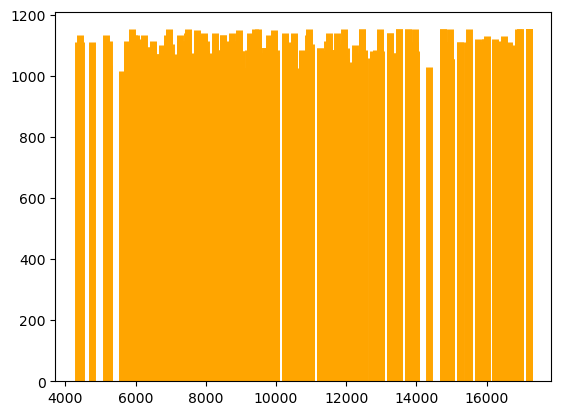

In [297]:
plt.show()

In [300]:
#### statistical Measures

In [302]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000,1435.0,1435.0,1435.000000
mean,10495.964460,55.992334,67644.520383,101.093380,0.0,1558.327526,4.032753,4.0,5.0,1068.520906
std,2977.598549,18.529725,34725.393258,13.146145,0.0,168.788311,0.952667,0.0,0.0,37.722708
min,4350.000000,5.000000,1.000000,69.000000,0.0,1300.000000,2.000000,4.0,5.0,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.0,1400.000000,3.000000,4.0,5.0,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.0,1600.000000,4.000000,4.0,5.0,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.0,1600.000000,5.000000,4.0,5.0,1085.000000
max,17200.000000,80.000000,153103.750000,140.000000,0.0,1900.000000,5.000000,4.0,5.0,1152.500000


In [304]:
### feature selection

In [306]:
import seaborn as sns
corr=df[['Price','KM','HP','cc','Doors','Weight']].corr()

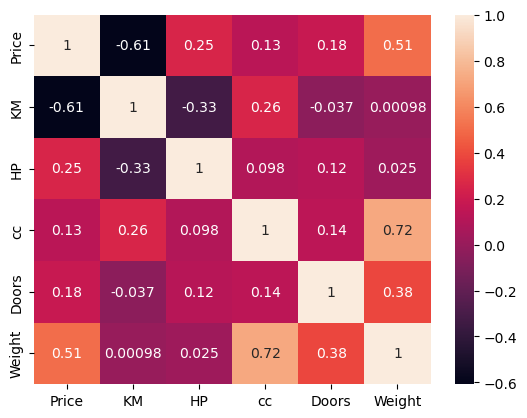

In [308]:
sns.heatmap(corr,annot=True)
plt.show()

In [310]:
from sklearn.preprocessing import LabelEncoder

In [312]:
l_encoder=LabelEncoder()
df['Fuel_Type']=l_encoder.fit_transform(df['Fuel_Type'])
print(df[['Fuel_Type']].head())

   Fuel_Type
0          1
1          1
2          1
3          1
4          1


In [314]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500.0,23.0,46986.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
1,13750.0,23.0,72937.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
2,13950.0,24.0,41711.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
3,14950.0,26.0,48000.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
4,13750.0,30.0,38500.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   float64
 1   Age_08_04  1435 non-null   float64
 2   KM         1435 non-null   float64
 3   Fuel_Type  1435 non-null   int32  
 4   HP         1435 non-null   float64
 5   Automatic  1435 non-null   float64
 6   cc         1435 non-null   float64
 7   Doors      1435 non-null   int64  
 8   Cylinders  1435 non-null   int64  
 9   Gears      1435 non-null   float64
 10  Weight     1435 non-null   float64
dtypes: float64(8), int32(1), int64(2)
memory usage: 128.9 KB


In [318]:
##### using the label encoder convert the Fuel_Type(string) to Fuel_Type(Text)

In [320]:
df.plot()

<Axes: >

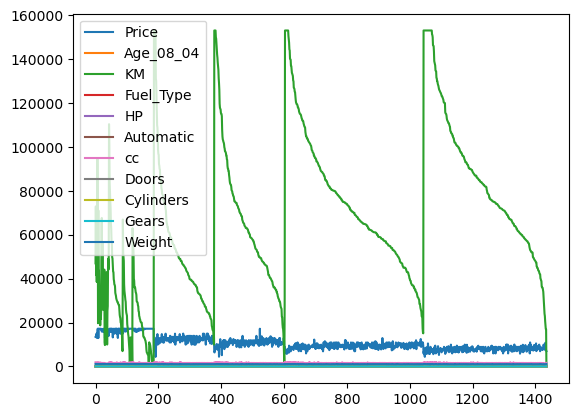

In [322]:

plt.show()

In [324]:
from sklearn.feature_selection import f_regression

In [326]:
target=df[['Price']]
features=df.drop(columns=["Price"])

In [328]:
f_reg=f_regression(features,target)

In [330]:
features.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23.0,46986.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
1,23.0,72937.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
2,24.0,41711.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
3,26.0,48000.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5
4,30.0,38500.0,1,90.0,0.0,1900.0,3,4,5.0,1152.5


In [332]:
#### check the multicolinearity then we can easily remove the lowest feature

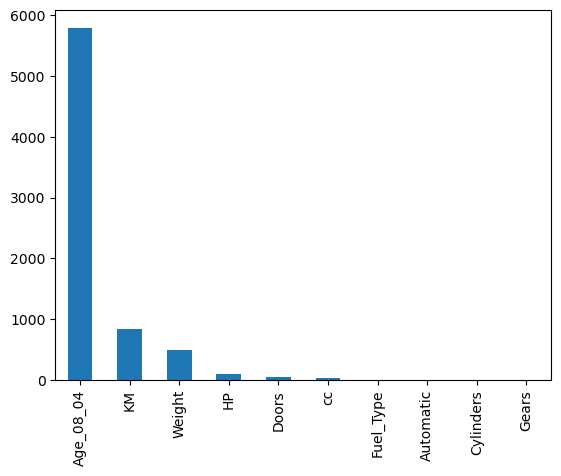

In [334]:
pd.Series(f_reg[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [336]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [338]:
features.columns

Index(['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [340]:
features.values

array([[2.3000e+01, 4.6986e+04, 1.0000e+00, ..., 4.0000e+00, 5.0000e+00,
        1.1525e+03],
       [2.3000e+01, 7.2937e+04, 1.0000e+00, ..., 4.0000e+00, 5.0000e+00,
        1.1525e+03],
       [2.4000e+01, 4.1711e+04, 1.0000e+00, ..., 4.0000e+00, 5.0000e+00,
        1.1525e+03],
       ...,
       [7.1000e+01, 1.7016e+04, 2.0000e+00, ..., 4.0000e+00, 5.0000e+00,
        1.0150e+03],
       [7.0000e+01, 1.6916e+04, 2.0000e+00, ..., 4.0000e+00, 5.0000e+00,
        1.0150e+03],
       [7.6000e+01, 1.0000e+00, 2.0000e+00, ..., 4.0000e+00, 5.0000e+00,
        1.1140e+03]])

In [342]:
features=features.drop(columns=['Fuel_Type', 'Automatic','Cylinders','Gears'])

In [344]:
features.head()

,Age_08_04,KM,HP,cc,Doors,Weight
0,23.0,46986.0,90.0,1900.0,3,1152.5
1,23.0,72937.0,90.0,1900.0,3,1152.5
2,24.0,41711.0,90.0,1900.0,3,1152.5
3,26.0,48000.0,90.0,1900.0,3,1152.5
4,30.0,38500.0,90.0,1900.0,3,1152.5


In [346]:
##### scaling

In [348]:
from sklearn.preprocessing import MinMaxScaler

In [350]:

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
features_scaled = pd.DataFrame(scaled_features, columns=features.columns)

In [352]:
features_scaled.head()

,Age_08_04,KM,HP,cc,Doors,Weight
0,0.240000,0.306885,0.295775,1.0,0.333333,1.0
1,0.240000,0.476386,0.295775,1.0,0.333333,1.0
2,0.253333,0.272431,0.295775,1.0,0.333333,1.0
3,0.280000,0.313508,0.295775,1.0,0.333333,1.0
4,0.333333,0.251459,0.295775,1.0,0.333333,1.0


In [354]:
target.head()

,Price
0,13500.0
1,13750.0
2,13950.0
3,14950.0
4,13750.0


In [356]:

scaled_target = scaler.fit_transform(target)


In [358]:
b= pd.DataFrame(scaled_target,columns=['price'])

In [360]:
b.head()

,price
0,0.712062
1,0.731518
2,0.747082
3,0.824903
4,0.731518


Training and Testing

In [363]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [365]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [367]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1148, 6)
(287, 6)
(1148, 1)
(287, 1)


In [369]:
x_train.head()

,Age_08_04,KM,HP,cc,Doors,Weight
108,20.0,7187.0,110.0,1600.0,3,1105.0
1280,78.0,73638.0,86.0,1300.0,4,1015.0
858,62.0,64797.0,110.0,1600.0,5,1075.0
903,65.0,59000.0,110.0,1600.0,5,1075.0
373,33.0,16512.0,97.0,1400.0,5,1085.0


In [371]:
x_test.head()

,Age_08_04,KM,HP,cc,Doors,Weight
57,26.0,43000.0,97.0,1400.0,5,1110.0
1003,62.0,39000.0,110.0,1600.0,5,1075.0
361,35.0,24011.0,97.0,1400.0,3,1025.0
904,61.0,59000.0,110.0,1600.0,5,1070.0
1277,79.0,74093.0,110.0,1600.0,5,1075.0


In [373]:
### model deployment using linear regression

In [375]:
from sklearn.linear_model import LinearRegression

In [377]:
lin_model=LinearRegression()

In [379]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [381]:
b1=lin_model.coef_

In [383]:
b1

array([[-1.05292763e+02, -1.58095486e-02,  2.64810353e+01,
        -2.45717156e+00, -8.16564146e+01,  2.46270159e+01]])

In [385]:
b0=lin_model.intercept_

In [387]:
b0

array([-7371.00404515])

In [389]:
### Training validation

In [391]:
x_train

,Age_08_04,KM,HP,cc,Doors,Weight
108,20.0,7187.0,110.0,1600.0,3,1105.0
1280,78.0,73638.0,86.0,1300.0,4,1015.0
858,62.0,64797.0,110.0,1600.0,5,1075.0
903,65.0,59000.0,110.0,1600.0,5,1075.0
373,33.0,16512.0,97.0,1400.0,5,1085.0
...,...,...,...,...,...,...
803,64.0,73376.0,110.0,1600.0,5,1070.0
53,27.0,49866.0,140.0,1800.0,5,1152.5
351,42.0,27141.0,97.0,1400.0,5,1060.0
79,30.0,22000.0,97.0,1400.0,5,1110.0


In [393]:
y_pred=lin_model.predict(x_train)
y_pred

array([[16358.84016672],
       [ 7004.81839321],
       [10123.63273289],
       ...,
       [12602.58796365],
       [15178.72880016],
       [ 9861.03496205]])

In [395]:
### find the accuracy

In [397]:
from sklearn.metrics import r2_score

In [399]:
r2_score(y_train,y_pred)

0.8675985105652546

In [401]:
### Testing validation

In [403]:
y_pred1=lin_model.predict(x_test)
y_pred

array([[16358.84016672],
       [ 7004.81839321],
       [10123.63273289],
       ...,
       [12602.58796365],
       [15178.72880016],
       [ 9861.03496205]])

In [405]:
### find the accuracy

In [407]:
r2_score(y_test,y_pred1)

0.8473627877706414

In [409]:
### Decision Tree

In [411]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

In [413]:
bag_class=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=100,bootstrap=True,max_features=1,bootstrap_features=True,max_samples=0.9,random_state=50)

In [415]:
bag_class.fit(x_train,y_train)

BaggingClassifier(bootstrap_features=True, estimator=DecisionTreeClassifier(),
                  max_features=1, max_samples=0.9, n_estimators=100,
                  random_state=50)

In [515]:
y_pred1=bag_class.predict(x_train)

In [517]:
y_pred1

array([17200.,  8450.,  7995., ...,  9950., 14900.,  8950.])

In [421]:
r2_score(y_train,y_pred)

0.7703907917554323

In [519]:
y_pred2=bag_class.predict(x_test)

In [521]:
y_pred2

array([17200.,  9950.,  8950.,  9950.,  7250., 17200., 17200., 17200.,
        6900.,  8950.,  8950., 12450., 11950.,  7950., 17200.,  9900.,
       17200., 17200., 17200., 12295., 10500.,  7500.,  9950., 17200.,
       10500.,  8500.,  8950.,  8950.,  7400.,  7250.,  8750., 10250.,
        9950., 17200.,  7995.,  9000.,  7950.,  8950.,  8750., 11750.,
        8950., 10950.,  7950., 10950.,  8950., 11500., 17200., 10950.,
        8950., 14750., 11000.,  9900.,  8950., 17200., 17200.,  8950.,
       17200.,  8250., 12695., 10950., 17200.,  8500., 14950., 11950.,
        7950., 17200.,  7500.,  8750., 17200.,  8950.,  9950.,  8950.,
       10500., 17200., 12450.,  8950.,  7500., 17200., 11950., 13995.,
        8250.,  6750., 10750.,  9950., 17200., 17200., 17200.,  6750.,
       10950.,  8950.,  8250.,  8500.,  7995.,  6495., 11250., 13500.,
       10900.,  8250.,  9500.,  7950.,  8750.,  9950.,  9500.,  8950.,
        9950.,  8950.,  7950.,  8000.,  8000.,  8450., 17200.,  8950.,
      

In [525]:
r2_score(y_test,y_pred2)

0.10381053304576937

In [527]:
### RandomForest

In [529]:
ran_for=RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='sqrt',max_samples=0.9,random_state=50)

In [531]:
ran_for.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.9, random_state=50)

In [533]:
y_pred2=ran_for.predict(x_train)

In [535]:
y_pred2

array([17200.,  8450.,  7995., ...,  9950., 14900.,  8950.])

In [445]:
r2_score(y_train,y_pred)

0.9996982516229459

In [537]:
y_pred3=ran_for.predict(x_test)

In [539]:
y_pred3

array([14950.,  9950., 10950.,  9950.,  7950.,  9450., 12950.,  6950.,
       12450.,  8900., 14990.,  7950., 11950.,  6750., 17200.,  8500.,
       11950., 14950., 16950.,  8750., 11950.,  9950., 10750.,  8750.,
        9950.,  7950.,  7800.,  7950.,  7800.,  7750.,  9895., 12900.,
        5950., 17200.,  9850.,  8950.,  7250.,  7950., 11690., 11950.,
        6900.,  7500.,  8250., 11990.,  7950.,  8450., 11000.,  6750.,
       10900., 11495.,  9750., 12000., 12500., 12900., 17200., 10950.,
       17200.,  8950., 12950., 10950., 17200.,  6950., 13995., 10900.,
       10950., 17200.,  9900., 11950., 11500.,  7950.,  9950.,  7300.,
        8900., 17200.,  8950.,  9750., 10950.,  9940.,  9950., 11710.,
        9750.,  9950., 12950.,  8950., 17200., 12500.,  9000.,  9250.,
        9950.,  9950.,  4400.,  8950.,  5250.,  9950., 10500.,  9750.,
       10950., 12950., 10900.,  8950., 11950.,  9500.,  8250.,  9950.,
        8950.,  8950.,  8500.,  9000.,  5250.,  6750., 17200.,  9800.,
      

In [541]:
r2_score(y_test,y_pred3)

0.7642668841051428

In [543]:
### in the above three models, found the training and testing accuracy in that random forest give the higher accuracy

In [545]:
## lasso and Ridge methods

In [547]:
from sklearn.linear_model import Lasso,Ridge

In [549]:
lasso=Lasso()

In [551]:
lasso.fit(x_train,y_train)

Lasso()

In [461]:
y_pred=lasso.predict(x_train)

In [463]:
y_pred

array([16356.74138729,  7005.55770003, 10124.75974499, ...,
       12604.03268351, 15178.91157613,  9862.11060509])

In [479]:
r2_score(y_train,y_pred)

0.8675983424101191

In [481]:
y_pred1=lasso.predict(x_test)

In [483]:
y_pred1

array([15268.00626545, 10532.71803033, 12690.02334562, 10198.73250486,
        8187.6835767 ,  9177.69823346, 13153.19904192,  7357.79724823,
       12656.72014299,  8613.73312094, 12607.16597439,  7932.36175133,
       11187.30808576,  6160.66961957, 16730.25402658,  8351.42863179,
       13201.41078753, 15392.33950259, 16295.87648111,  9280.94336286,
       11815.30904803, 10000.6024671 , 10780.27407258, 11405.69982903,
        8366.33528832,  8678.86890451,  9646.63529488,  8477.53922601,
        9321.93864355,  8154.23436428,  9114.27984067, 11259.88289067,
        7214.4566609 , 18033.77998588,  9354.6666736 ,  9310.97941993,
        7185.07043429,  8585.9703416 , 13381.64824574, 10159.05421175,
        7864.85909538,  8097.89695792,  9428.73721069, 13277.90436186,
        8862.84252131,  9249.40465707, 12072.03588409,  7477.59606845,
       10577.2378133 , 12096.70784696,  9857.11465754, 12608.70399079,
       12150.406187  , 13707.86424564, 16151.9675347 , 10716.42296487,
      

In [485]:
r2_score(y_test,y_pred1)

0.8473485413722637

In [487]:
ridge=Ridge()


In [489]:
ridge.fit(x_train,y_train)

Ridge()

In [493]:
y_pred=ridge.predict(x_train)

In [495]:
y_pred

array([[16358.69411893],
       [ 7004.86791261],
       [10123.71492722],
       ...,
       [12602.68633798],
       [15178.7462685 ],
       [ 9861.11404394]])

In [497]:
r2_score(y_train,y_pred)

0.8675985097602854

In [501]:
y_pred1=ridge.predict(x_test)

In [503]:
y_pred1

array([[15267.91118191],
       [10531.56151723],
       [12690.44655069],
       [10197.53087191],
       [ 8186.76698906],
       [ 9177.9560661 ],
       [13151.91642337],
       [ 7357.09221938],
       [12655.66270931],
       [ 8613.13858941],
       [12608.09370906],
       [ 7931.96982565],
       [11186.27449432],
       [ 6159.47750635],
       [16728.65436424],
       [ 8352.53343049],
       [13199.99550263],
       [15394.56801052],
       [16298.09415222],
       [ 9281.9119405 ],
       [11816.08584444],
       [10002.04389268],
       [10780.81802593],
       [11404.12862128],
       [ 8367.73814826],
       [ 8677.24752874],
       [ 9647.62202111],
       [ 8476.8585919 ],
       [ 9323.01426881],
       [ 8155.36949864],
       [ 9113.69019003],
       [11258.90928536],
       [ 7215.08419318],
       [18033.60946508],
       [ 9355.70968387],
       [ 9312.05804573],
       [ 7184.5447903 ],
       [ 8584.93977798],
       [13380.39769725],
       [10158.28202206],


In [511]:
r2_score(y_test,y_pred1)

0.847361678087246

In [1]:
### interview question and answers

What is Normalization & Standardization and how is it helpful?

In [4]:
## Normalization :Normalization is the process of scaling numerical features to a fixed range, usually between 0 and 1.it is hepful by measuring the features in a equal contribution.
## Standardization:Standardization scales data so that it has a mean = 0 and standard deviation = 1.it converts the data into a standard normal distribution. it is helpful by measuring each feature contributes equally to the model.

What techniques can be used to address multicollinearity in multiple linear regression?

In [7]:
## Multicollinearity occurs when two or more independent (predictor) variables are highly correlated.
## Correlation Matrix: Check pairwise correlations between variables.
##ariance Inflation Factor (VIF):Measures how much variance of a coefficient is inflated by multicollinearity.